In [38]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [39]:
config = load_config_and_check("../config/experiment_v10.yaml")

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from analyser import Explorer

In [66]:
exp = Explorer(config)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_qiskit - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_cirq - PROGRAM INFO - reading ...  
BENCHMARK: program_vs_random - PROGRAM INFO - reading ...  
BENCHMARK: negation - PROGRAM INFO - reading ...  
BENCHMARK: program_x_vs_program_y - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_qiskit - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_cirq - EXECUTION INFO - reading ...  
BENCHMARK: program_vs_random - EXECUTION INFO - reading ...  
BENCHMARK: negation - EXECUTION INFO - reading ...  
BENCHMARK: program_x_vs_program_y - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: across_runs_qiskit - GROUND TRUTH - reading ...

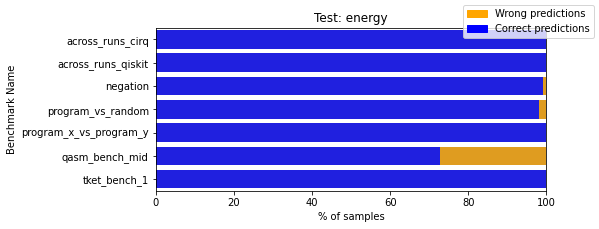

In [67]:
exp.classify_based_on_pvalue()
exp.focus_on_detector("energy")
exp.plot_benchmark_categories()

In [68]:
df = exp.df_all
df.head()

,circuit_id,benchmark_name,test,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,random_seed,...,circuit_id_execution_level,execution_a,execution_b,output_size_a,output_size_b,output_size_total,output_coverage_a,output_coverage_b,prediction_divergence,correct_prediction
0,1,qasm_bench_mid,energy,cirq,qiskit,../data/experiment_v10/qasm_bench_mid/executio...,../data/experiment_v10/qasm_bench_mid/executio...,0.000000,-1.00000,4321.0,...,1_0,"{'101': 2083, '110': 1999, '100': 1978, '111':...","{'10000000000': 2025, '11000000001': 2124, '10...",4,4,2048,0.001953,0.001953,True,False
1,53,program_x_vs_program_y,energy,cirq_algo_x,cirq_algo_y,../data/experiment_v10/program_x_vs_program_y/...,../data/experiment_v10/program_x_vs_program_y/...,0.211588,0.00001,4321.0,...,53_0,"{'00011': 469, '00110': 438, '00100': 302, '00...","{'01101': 151, '11110': 1295, '10010': 74, '00...",32,31,32,1.000000,1.000000,True,True
2,46,negation,energy,cirq,fake_random,../data/experiment_v10/negation/executions/cir...,../data/experiment_v10/negation/executions/fak...,0.100769,0.00001,4321.0,...,46_0,"{'1100011011': 148, '1001111111': 14, '0110011...","{'0110100100': 40, '0111111001': 100, '0010100...",752,769,1024,0.734375,0.734375,True,True
3,8,program_vs_random,energy,cirq,fake_random,../data/experiment_v10/program_vs_random/execu...,../data/experiment_v10/program_vs_random/execu...,0.030381,0.00001,4321.0,...,8_0,"{'100111101000': 7, '001001000101': 9, '001001...","{'101011000000': 2, '001101110101': 2, '101001...",2445,3546,4096,0.596924,0.596924,True,True
4,8,program_x_vs_program_y,energy,cirq_algo_x,cirq_algo_y,../data/experiment_v10/program_x_vs_program_y/...,../data/experiment_v10/program_x_vs_program_y/...,0.186206,0.00001,4321.0,...,8_0,"{'1100001011': 20, '0010101101': 54, '00011100...","{'0011000101': 39, '1111011100': 145, '1000000...",911,382,1024,0.889648,0.889648,True,True


In [69]:
df[["statistic", "expected_divergence", "p_value"]].head()

,statistic,expected_divergence,p_value
0,0.000000,False,-1.00000
1,0.211588,True,0.00001
2,0.100769,True,0.00001
3,0.030381,True,0.00001
4,0.186206,True,0.00001


In [70]:
pred = df["statistic"]
# 1 = alarm (divergence) = high statistic (distributions distance)
# 0 = normal = low statistic
pred

0      0.000000
1      0.211588
2      0.100769
3      0.030381
4      0.186206
         ...   
606    0.000335
607    0.000476
608    0.000000
609    0.000619
610    0.000000
Name: statistic, Length: 611, dtype: float64

In [71]:
y = df["expected_divergence"].astype(int)
y

0      0
1      1
2      1
3      1
4      1
      ..
606    0
607    0
608    0
609    0
610    0
Name: expected_divergence, Length: 611, dtype: int64

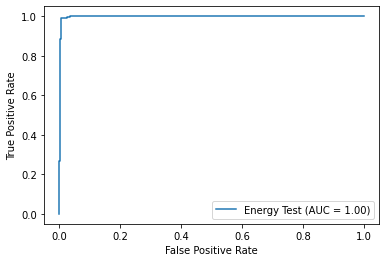

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Energy Test')
display.plot()
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   circuit_id                  611 non-null    object 
 1   benchmark_name              611 non-null    object 
 2   test                        611 non-null    object 
 3   platform_a                  611 non-null    object 
 4   platform_b                  611 non-null    object 
 5   path_exec_a                 611 non-null    object 
 6   path_exec_b                 611 non-null    object 
 7   statistic                   611 non-null    float64
 8   p_value                     611 non-null    float64
 9   random_seed                 611 non-null    float64
 10  expected_divergence         611 non-null    bool   
 11  label                       611 non-null    int64  
 12  n_qubits                    611 non-null    int64  
 13  strategy_a                  611 non

**Conclusion**: the energy test with threshold 0.001 and 8192 shots performs very well also on the test dataset.

## Try Energy Test with 0.001 on non-benchmark data

In [4]:
FOLDER_ENERGY_DETECTION = "../data/experiment_v08/cross_platform/predictions/energy"

In [78]:
def load_execution_data(path_detection_folder):
    detector_data = []
    
    for filename, detector_res in iterate_over(path_detection_folder, filetype=".json", parse_json=True):
        print(f"Reading: {filename}")
        # remove the comparison
        pairs = detector_res.pop('comparisons', None)

        for pair in pairs:
            new_record = {**pair, **detector_res}
            detector_data.append(new_record)

    df_detector_results = pd.DataFrame.from_records(detector_data)
    #return df_detector_results
    
    print(len(df_detector_results))
    df_grouped = df_detector_results.groupby(by=[
        "circuit_id", "comparison_name", "test", "platform_a", "platform_b"
    ]).median().sort_values(by="p_value").reset_index()
    df_grouped.rename(columns={"comparison_name":"benchmark_name"}, inplace=True)
    print(len(df_grouped))
    return df_grouped

df_results = load_execution_data(path_detection_folder=FOLDER_ENERGY_DETECTION)

Reading: 1235
Reading: 115
Reading: 101
Reading: 1690
Reading: 1792
Reading: 2011
Reading: 1244
Reading: 2087
Reading: 2201
Reading: 2047
Reading: 1452
Reading: 1050
Reading: 1974
Reading: 1944
Reading: 1741
Reading: 1923
Reading: 136
Reading: 1804
Reading: 1199
Reading: 1188
Reading: 1757
Reading: 1007
Reading: 2057
Reading: 1769
Reading: 1114
Reading: 1247
Reading: 2039
Reading: 2209
Reading: 2023
Reading: 1218
Reading: 1873
Reading: 1670
Reading: 1418
Reading: 1903
Reading: 1548
Reading: 1889
Reading: 2171
Reading: 1239
Reading: 1962
Reading: 2175
Reading: 1441
Reading: 1185
Reading: 1139
Reading: 129
Reading: 1671
Reading: 1951
Reading: 2027
Reading: 1848
Reading: 1956
Reading: 1300
Reading: 1208
Reading: 2138
Reading: 1914
Reading: 1477
Reading: 172
Reading: 1963
Reading: 1549
Reading: 1925
Reading: 2164
Reading: 1419
Reading: 1710
Reading: 1361
Reading: 1499
Reading: 2072
Reading: 1537
Reading: 100
Reading: 1815
Reading: 1898
Reading: 1159
Reading: 1376
Reading: 19
Reading: 1628


Reading: 1826
Reading: 1310
Reading: 1364
Reading: 1123
Reading: 2215
Reading: 1473
Reading: 1781
Reading: 1366
Reading: 1568
Reading: 1868
Reading: 1109
Reading: 1133
Reading: 2123
Reading: 1525
Reading: 1841
Reading: 205
Reading: 2181
Reading: 1124
Reading: 202
Reading: 1260
Reading: 1878
Reading: 1341
Reading: 1173
Reading: 1876
Reading: 1216
Reading: 1553
Reading: 1372
Reading: 2111
Reading: 1021
Reading: 112
Reading: 1037
Reading: 1629
Reading: 2008
Reading: 1353
Reading: 2126
Reading: 1932
Reading: 1117
Reading: 1778
Reading: 1859
Reading: 1186
Reading: 1969
Reading: 1751
Reading: 2207
Reading: 1613
Reading: 2113
Reading: 127
Reading: 1590
Reading: 2075
Reading: 1607
Reading: 1767
Reading: 1783
Reading: 1438
Reading: 2064
Reading: 1733
Reading: 1916
Reading: 2212
Reading: 1954
Reading: 1118
Reading: 1288
Reading: 1686
Reading: 1342
Reading: 1408
Reading: 1913
Reading: 1241
Reading: 1343
Reading: 138
Reading: 1610
Reading: 1371
Reading: 1144
Reading: 131
Reading: 135
Reading: 139


33900
1356


In [79]:
df_results.head()

,circuit_id,benchmark_name,test,platform_a,platform_b,statistic,p_value,random_seed
0,0,cross_platform,energy,cirq,qiskit,0.000098,1.0,4321.0
1,1815,cross_platform,energy,cirq,qiskit,0.000229,1.0,4321.0
2,1814,cross_platform,energy,cirq,qiskit,0.000202,1.0,4321.0
3,1813,cross_platform,energy,cirq,qiskit,0.000180,1.0,4321.0
4,1812,cross_platform,energy,cirq,qiskit,0.000180,1.0,4321.0


<AxesSubplot:xlabel='p_value', ylabel='Count'>

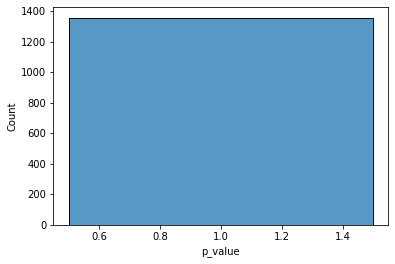

In [80]:
sns.histplot(
    data=df_results,
    x='p_value'
)

In [77]:
df_divergent = df_results[df_results['p_value'] < .05]
df_divergent.head(30)

,circuit_id,benchmark_name,test,platform_a,platform_b,statistic,p_value,random_seed
